In [ ]:
!pip install astroML
!pip install PyMC3
!pip install theano

In [ ]:
from astroML.datasets import generate_mu_z
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
from astroML.linear_model import PolynomialRegression
from astroML.linear_model import BasisFunctionRegression
import numpy as np

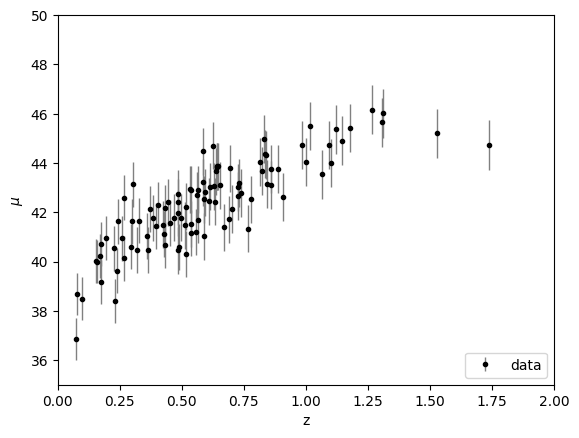

In [ ]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

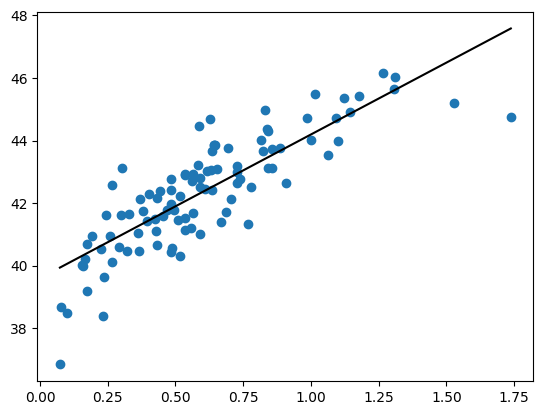

In [ ]:
lin = LinearRegression()
lin.fit(z_sample[:, None], mu_sample, dmu)
plt.scatter(z_sample, mu_sample)
plt.plot(np.sort(z_sample), lin.predict(np.sort(z_sample)[:, None]), color = 'black');

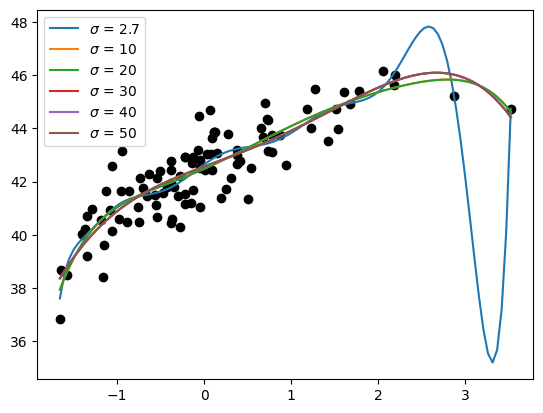

In [ ]:
scaler = StandardScaler()
z_test = scaler.fit_transform(z_sample[:, None])
z_lin = np.linspace(min(z_test), max(z_test), 100)
sigmatest = [2.7, 10, 20, 30, 40, 50]
for sigma in sigmatest:
  basis = BasisFunctionRegression('gaussian', mu=z_lin, sigma=sigma)
  basis.fit(z_test, mu_sample, dmu)
  plt.plot(z_lin, basis.predict(z_lin), label = r'$\sigma$ = '+str(sigma))

plt.scatter(z_test, mu_sample, color = 'black')
plt.legend()

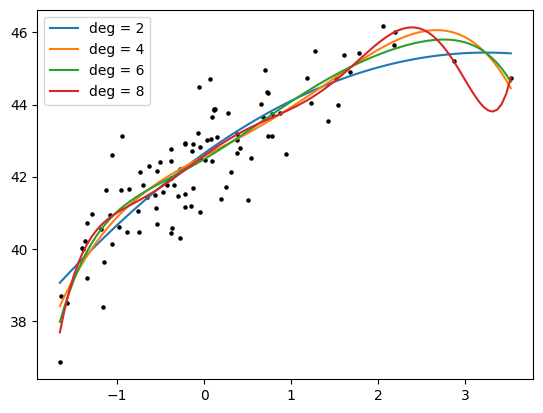

In [ ]:
scaler = StandardScaler()
z_test = scaler.fit_transform(z_sample[:, None])
z_lin = np.linspace(min(z_test), max(z_test), 100)
degree = [2,4,6,8]
for deg in degree:
    model = PolynomialRegression(deg) # fit degth degree polynomial
    model.fit(z_test, mu_sample)
    plt.plot(z_lin, model.predict(z_lin), label = 'deg = '+ str(deg))

plt.scatter(z_test, mu_sample, s = 5, color = 'black')
plt.legend()
plt.show()

Intuition: best fit is 2 degree polynomial

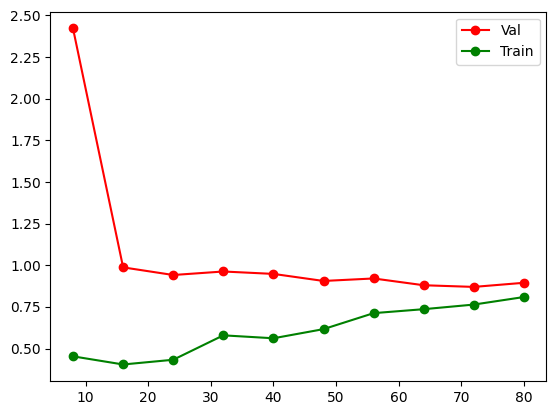

In [ ]:
scaler = StandardScaler()
z_test = scaler.fit_transform(z_sample[:, None])
degree = [2]
x = 0
for deg in degree:
    model = PolynomialRegression(deg) # fit degth degree polynomial
    model.fit(z_test, mu_sample)
    train_sizes, train_scores_mod, test_scores_mod = \
    learning_curve(model, z_test, mu_sample, train_sizes=np.linspace(0.1, 1, 10), \
                   scoring="neg_mean_squared_error", cv=5)
    plt.plot(train_sizes, -test_scores_mod.mean(1), 'o-', color="r", label="Val")
    plt.plot(train_sizes, -train_scores_mod.mean(1), 'o-', color="g", label="Train")
plt.legend()
plt.show()

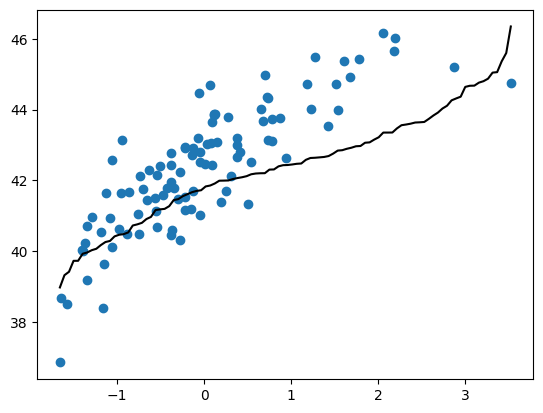

In [ ]:
from sklearn.model_selection import cross_val_predict

ypred = cross_val_predict(model, z_test, mu_sample, cv=5)
plt.plot(z_lin, np.sort(ypred), color = 'black')
plt.scatter(z_test, mu_sample)